In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
## Update the experiments directory
DATA_DIRECTORY_AM = '/content/gdrive/Shareddrives/CS 506 Project (Work from Home)/DATA - Working From the Home Environment /4 Month Data/Daily AM/7103000 (2).csv'
DATA_DIRECTORY_PM = '/content/gdrive/Shareddrives/CS 506 Project (Work from Home)/DATA - Working From the Home Environment /4 Month Data/Daily PM/7106000 (1).csv'
DATA_DIRECTORY_END = '/content/gdrive/Shareddrives/CS 506 Project (Work from Home)/DATA - Working From the Home Environment /4 Month Data/Daily END/7108000 (1).csv'

Mounted at /content/gdrive


In [ ]:
DATA_AM = pd.read_csv(DATA_DIRECTORY_AM, index_col=False, header=0)
DATA_PM = pd.read_csv(DATA_DIRECTORY_PM,  encoding='cp1252')
DATA_END = pd.read_csv(DATA_DIRECTORY_END)

In [ ]:
DATA_PM_DROPPED = DATA_PM.dropna()
value = DATA_PM['HOMUNCULUS'][0]
splitter = value.split(',')
DATA_PM_HOM = DATA_PM_DROPPED.copy()
for split in splitter:
  newsplit = split.split(':')
  DATA_PM_HOM[newsplit] = None
DATA_PM_HOM['SUMMED VALUES'] = None

In [ ]:
from datetime import datetime as dt
def applyFunc(row):
  summedVal = 0
  date = dt.strptime(row[3], "%Y-%m-%d %H:%M:%S")
  row[3] = date.strftime("%Y-%m-%d")
  startnum = 22
  splitter = row[6].split(',')
  if len(splitter) == 1:
    return row
  for split in splitter:
    newsplit = split.split(':')
    row[startnum] = int(newsplit[1])
    summedVal += int(newsplit[1])
    startnum += 1
  row[90] = summedVal
  return row
def applyTimeFunc(row):
  date = dt.strptime(row[3], "%Y-%m-%d %H:%M:%S")
  row[3] = date.strftime("%Y-%m-%d")
  return row
  
DATA_PM_SPLITTED = DATA_PM_HOM.apply(applyFunc, axis = 1)
DATA_END_TIME = DATA_END.apply(applyTimeFunc, axis = 1)

In [ ]:
mergedTables = pd.merge(DATA_PM_SPLITTED, DATA_END_TIME, how = 'inner', left_on=['mbl_cod', 'rsp_id', 'local_time'], right_on=['mbl_cod', 'rsp_id', 'local_time'])
num_breaks = mergedTables.DAILY_BREAKS.values
total_pain = mergedTables['SUMMED VALUES'].values

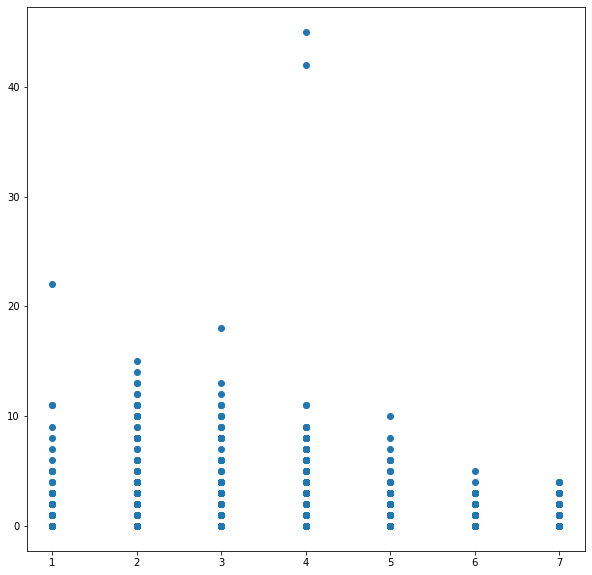

In [ ]:
plt.scatter(num_breaks, total_pain)
plt.gcf().set_size_inches((10, 10))  


In [ ]:
masked_breaks = np.ma.masked_invalid(num_breaks)
masked_pain = np.ma.masked_invalid(total_pain)
msk = (~masked_breaks.mask & ~masked_pain.mask)
corr_coef = np.corrcoef(masked_breaks[msk], masked_pain[msk] )
print(corr_coef)


[[ 1.         -0.09628702]
 [-0.09628702  1.        ]]


In [ ]:
fourormore = []
twoorless = []
for i in range(len(num_breaks)):
  if num_breaks[i] >= 4:
    if not np.isnan(total_pain[i]):
      fourormore.append(total_pain[i])
  if num_breaks[i] <= 2:
    if not np.isnan(total_pain[i]):
      twoorless.append(total_pain[i])
  

In [ ]:
avgfourormore = sum(fourormore) / len(fourormore)
avgtwooress = sum(twoorless) / len(twoorless)

print("AVERAGE PAIN FOR FOUR OR MORE BREAKS IS " + str(avgfourormore))
print("AVERAGE PAIN FOR TWO OR LESS BREAKS IS " + str(avgtwooress))

AVERAGE PAIN FOR FOUR OR MORE BREAKS IS 1.2077534791252484
AVERAGE PAIN FOR TWO OR LESS BREAKS IS 1.615530303030303


In [ ]:
from sklearn.cluster import KMeans

nump = mergedTables.drop(columns=["0"])
nump = nump.to_numpy()
X = nump[:, 22:89]
y = nump[:, 91].reshape(X.shape[0],1)
Xy = np.append(X, y, axis = 1)
Xy = pd.DataFrame(Xy)
Xy = Xy.dropna()
Xy = Xy.to_numpy()
X = Xy[:,:-1]
y = Xy[:, -1]
cluster = KMeans(n_clusters=7)
fitted = cluster.fit_predict(X)
def disagreement_dist(P_labels, C_labels):
    disagreement_dist = 0
    for i in range(P_labels.shape[0]):
        for j in range(i + 1, P_labels.shape[0]):
            bucket1 = P_labels[i]
            bucket2 = C_labels[i]
            bucket3 = P_labels[j]
            bucket4 = C_labels[j]
            if bucket1 == bucket3 and bucket2 != bucket4:
                disagreement_dist += 1
            if bucket2 == bucket4 and bucket1 != bucket3:
                disagreement_dist += 1
    return disagreement_dist
  
print(len(fitted))

print(disagreement_dist(y, fitted))


1989
933668


# Statistical tests

Participants who take an average of 2 or fewer breaks per day will report more pain and less comfort than those who take an average of 4 or more breaks per day. Now we will conduct hypothesis tests.

(array([434.,  46.,  15.,  10.,   9.,  11.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

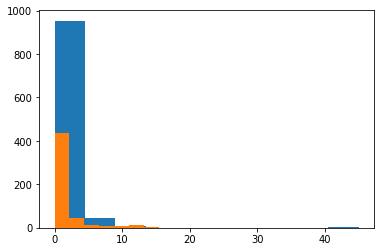

In [ ]:
#Assumption checking for modified
#1.Random distribution
#DATA CLEARNING HERE
import seaborn as sb  
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt
from scipy.stats import norm, uniform
import numpy

plt.hist(fourormore)
plt.hist(twoorless)

In [ ]:
import numpy as np

q3, q1 = np.percentile(fourormore, [75, 25])
print(q3, q1)
print(len(fourormore))
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
newfourormore = [x for x in fourormore if (x<upper_bound) & (x>lower_bound)]


2.0 0.0
1006


In [ ]:
print(len(newfourormore))
print(len(fourormore))

953
1006


In [ ]:

q3, q1 = np.percentile(twoorless, [75, 25])
print(q3, q1)
print(len(twoorless))
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
newtwoorless = [x for x in twoorless if (x<upper_bound) &(x>lower_bound) ]

2.0 0.0
528


In [ ]:
print(len(newtwoorless))
print(len(twoorless))

480
528


(array([241.,   0., 112.,   0.,   0.,  81.,   0.,  28.,   0.,  18.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

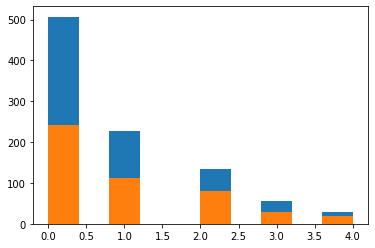

In [ ]:
plt.hist(newfourormore)
plt.hist(newtwoorless)

Here it shows high screwness. However, we can regard them as normally distributed.  Before conducting the paired t test, we need to show their variances are equal as an assumption. Therefore, we need to conduct F test first. 

#The 4 MONTH

Null hypothesis: Their variances are the same
Alternative hypothesis: Their variances are different

In [ ]:
from scipy.stats import f_oneway
stat, p = f_oneway(newfourormore, newtwoorless)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('We can not reject the null hypothesis')
else:
	print('We reject the hypothesis')

stat=1.574, p=0.210
We can not reject the null hypothesis


Therefore, we are ready to conduct the paired t test

In [ ]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
from scipy import stats

stats.ttest_ind(newtwoorless, newfourormore, equal_var = False)


Ttest_indResult(statistic=1.2411404920701938, pvalue=0.2148658967278559)

Since pvalue is larger than a = 0.05, then there is no significant different between thw two group. 

In [ ]:
stats.ttest_ind(twoorless, fourormore, equal_var = False)

Ttest_indResult(statistic=2.8599108946686727, pvalue=0.004324160262837438)

The interesting thing is that before we clear out the ourliers, there is a significant difference between them. So maybe it is because of the outlier that plays such an effect. In other words, there is a significant different between the pain for people rest less than 2 and people rest more than 3 times because some people are originally painful even before when they rest for larger times. And when we exclude those people who are originally painful, we are analysing the other group of people who strategically decided to avoid pain by take a large number of breaks. Howevver, by comparing those people, we found no significance. Maybe there is a significance for people who rest more times.

In [ ]:
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import t
import pandas as pd

def welch_ttest(x1, x2,alternative):
    
    n1 = len(x1)
    n2 = len(x2)
    m1 = np.mean(x1)
    m2 = np.mean(x2)
    
    v1 = np.var(x1, ddof=1)
    v2 = np.var(x2, ddof=1)
    
    pooled_se = np.sqrt(v1 / n1 + v2 / n2)
    delta = m1-m2
    
    tstat = delta /  pooled_se
    df = (v1 / n1 + v2 / n2)**2 / (v1**2 / (n1**2 * (n1 - 1)) + v2**2 / (n2**2 * (n2 - 1)))
    
    # two side t-test
    p = 2 * t.cdf(-abs(tstat), df)
    
    # upper and lower bounds
    lb = delta - t.ppf(0.975,df)*pooled_se 
    ub = delta + t.ppf(0.975,df)*pooled_se
  
    return pd.DataFrame(np.array([tstat,df,p,delta,lb,ub]).reshape(1,-1),
                         columns=['T statistic','df','pvalue 2 sided','Difference in mean','lb','ub'])

In [ ]:
print(welch_ttest(twoorless,fourormore,"equal"))

   T statistic           df  pvalue 2 sided  Difference in mean        lb  \
0     2.859911  1018.189044        0.004324            0.407777  0.127985   

         ub  
0  0.687568  


In [ ]:
print(welch_ttest(newtwoorless,newfourormore,"equal"))

   T statistic          df  pvalue 2 sided  Difference in mean        lb  \
0      1.24114  932.756623        0.214866            0.076316 -0.044356   

         ub  
0  0.196988  


With the functional programming, we found that both lower confidence interval and higher confidence interval are both larger than 0. Which means that the mean pain for people who rest four or more times is larger than that of people who rest two or less timee

# The 2 Month

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
## Update the experiments directory
DATA_DIRECTORY_AM2 = '/content/gdrive/Shareddrives/CS 506 Project (Work from Home)/DATA - Working From the Home Environment /2 Month Data/Rapid Reports/Daily AM.csv'
DATA_DIRECTORY_PM2 = '/content/gdrive/Shareddrives/CS 506 Project (Work from Home)/DATA - Working From the Home Environment /2 Month Data/Rapid Reports/Daily PM.csv'
DATA_DIRECTORY_END2 = '/content/gdrive/Shareddrives/CS 506 Project (Work from Home)/DATA - Working From the Home Environment /2 Month Data/Rapid Reports/Daily END.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
DATA_AM2 = pd.read_csv(DATA_DIRECTORY_AM2, index_col=False, header=0)
DATA_PM2 = pd.read_csv(DATA_DIRECTORY_PM2,  encoding='cp1252')
DATA_END2 = pd.read_csv(DATA_DIRECTORY_END2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PM_DROPPED2 = DATA_PM2.dropna()
value2 = DATA_PM2['HOMUNCULUS'][0]
splitter2 = value2.split(',')
DATA_PM_HOM2 = DATA_PM_DROPPED2.copy()
for split in splitter2:
  newsplit = split.split(':')
  DATA_PM_HOM2[newsplit] = None
DATA_PM_HOM2['SUMMED VALUES'] = None

DATA_PM_SPLITTED2 = DATA_PM_HOM2.apply(applyFunc, axis = 1)
DATA_END_TIME2 = DATA_END2.apply(applyTimeFunc, axis = 1)
mergedTables2 = pd.merge(DATA_PM_SPLITTED2, DATA_END_TIME2, how = 'inner', left_on=['mbl_cod', 'rsp_id', 'local_time'], right_on=['mbl_cod', 'rsp_id', 'local_time'])
num_breaks2 = mergedTables2.DAILY_BREAKS.values
total_pain2 = mergedTables2['SUMMED VALUES'].values

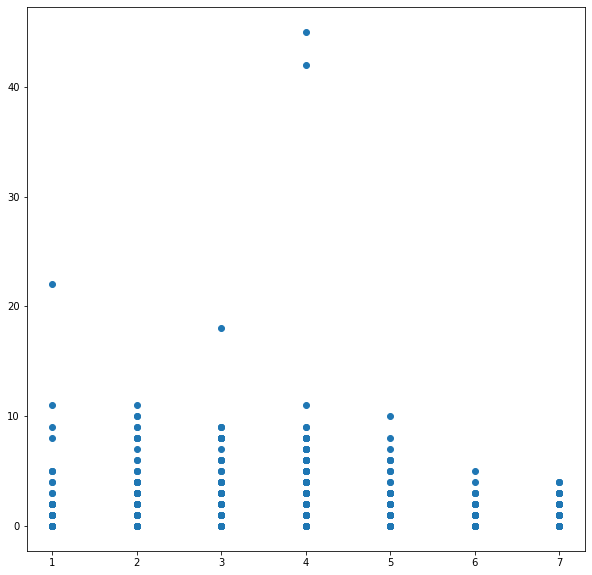

In [ ]:
plt.scatter(num_breaks2, total_pain2)
plt.gcf().set_size_inches((10, 10))  


In [ ]:
masked_breaks2 = np.ma.masked_invalid(num_breaks2)
masked_pain2 = np.ma.masked_invalid(total_pain2)
msk = (~masked_breaks2.mask & ~masked_pain2.mask)
corr_coef2 = np.corrcoef(masked_breaks2[msk], masked_pain2[msk] )
print(corr_coef2)


[[ 1.         -0.05936993]
 [-0.05936993  1.        ]]


In [ ]:
fourormore2 = []
twoorless2 = []
for i in range(len(num_breaks2)):
  if num_breaks2[i] >= 4:
    if not np.isnan(total_pain2[i]):
      fourormore2.append(total_pain2[i])
  if num_breaks2[i] <= 2:
    if not np.isnan(total_pain2[i]):
      twoorless2.append(total_pain2[i])
avgfourormore2 = sum(fourormore2) / len(fourormore2)
avgtwooress2 = sum(twoorless2) / len(twoorless2)

print("AVERAGE PAIN FOR FOUR OR MORE BREAKS IS " + str(avgfourormore2))
print("AVERAGE PAIN FOR TWO OR LESS BREAKS IS " + str(avgtwooress2))
  

AVERAGE PAIN FOR FOUR OR MORE BREAKS IS 1.5785837651122625
AVERAGE PAIN FOR TWO OR LESS BREAKS IS 1.5075757575757576


In [ ]:
from sklearn.cluster import KMeans
nump2 = mergedTables2.drop(columns=["0"])
nump2 = nump2.to_numpy()
X2 = nump2[:, 22:89]
y2 = nump2[:, 91].reshape(X2.shape[0],1)
Xy2 = np.append(X2, y2, axis = 1)
Xy2 = pd.DataFrame(Xy2)
Xy2 = Xy2.dropna()
Xy2 = Xy2.to_numpy()
X2 = Xy2[:,:-1]
y2 = Xy2[:, -1]
cluster2 = KMeans(n_clusters=7)
fitted2 = cluster2.fit_predict(X2)
def disagreement_dist(P_labels, C_labels):
    disagreement_dist = 0
    for i in range(P_labels.shape[0]):
        for j in range(i + 1, P_labels.shape[0]):
            bucket1 = P_labels[i]
            bucket2 = C_labels[i]
            bucket3 = P_labels[j]
            bucket4 = C_labels[j]
            if bucket1 == bucket3 and bucket2 != bucket4:
                disagreement_dist += 1
            if bucket2 == bucket4 and bucket1 != bucket3:
                disagreement_dist += 1
    return disagreement_dist
  
print(len(fitted2))
2
print(disagreement_dist(y2, fitted2))


1080
275186


(array([220.,  21.,   8.,   7.,   5.,   2.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

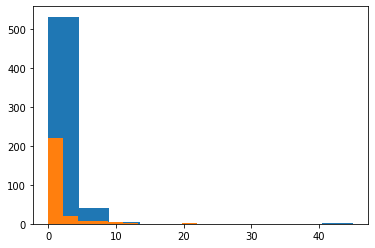

In [ ]:
#Assumption checking for modified
#1.Random distribution
#DATA CLEARNING HERE
import seaborn as sb  
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt
from scipy.stats import norm, uniform
import numpy
plt.hist(fourormore2)
plt.hist(twoorless2)

In [ ]:
import numpy as np

q3, q1 = np.percentile(fourormore2, [75, 25])
print(q3, q1)
print(len(fourormore2))
IQR2 = q3 - q1
upper_bound2 = q3 + 1.5 * IQR2
lower_bound2 = q1 - 1.5 * IQR2
newfourormore2 = [x for x in fourormore2 if (x<upper_bound2) & (x>lower_bound2)]

q3, q1 = np.percentile(twoorless2, [75, 25])
print(q3, q1)
print(len(twoorless2))
IQR2 = q3 - q1
upper_bound2 = q3 + 1.5 * IQR2
lower_bound2 = q1 - 1.5 * IQR2
newtwoorless2 = [x for x in twoorless2 if (x<upper_bound2) &(x>lower_bound2) ]

2.0 0.0
579
2.0 0.0
264


In [ ]:
print(len(newtwoorless2))
print(len(twoorless2))

241
264


(array([121.,   0.,  60.,   0.,   0.,  39.,   0.,  12.,   0.,   9.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

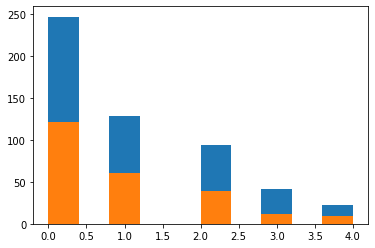

In [ ]:
plt.hist(newfourormore2)
plt.hist(newtwoorless2)

In [ ]:
from scipy.stats import f_oneway
stat, p = f_oneway(newfourormore2, newtwoorless2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('We can not reject the null hypothesis')
else:
	print('We reject the hypothesis')

stat=1.840, p=0.175
We can not reject the null hypothesis


In [ ]:
print(welch_ttest(newtwoorless2,newfourormore2,"equal"))

   T statistic          df  pvalue 2 sided  Difference in mean        lb  \
0     -1.38455  487.419399        0.166824           -0.119232 -0.288437   

         ub  
0  0.049973  


In [ ]:
print(welch_ttest(twoorless2,fourormore2,"equal"))

   T statistic          df  pvalue 2 sided  Difference in mean        lb  \
0     -0.34942  619.317358        0.726893           -0.071008 -0.470085   

         ub  
0  0.328069  


THIS Shows that when we dropped the oultier, we are more towards to agree the differences rest < 2 and rest > 4. This is totally different from the conclusion we draw from the previous data analysis for 4-month data. Hence, we are suspecting that the cause-effect relationship between num of rest and num of time someone felt pain. 

This take us to re-consider the method to deal with "outliers" maybe we need to separate the datasets into culster to further study their properties. 

# The 3 Month

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
## Update the experiments directory
DATA_DIRECTORY_AM3 ='/content/gdrive/Shareddrives/CS 506 Project (Work from Home)/DATA - Working From the Home Environment /3 Month Data/Daily AM/7103000 (1).csv'
DATA_DIRECTORY_END3 ='/content/gdrive/Shareddrives/CS 506 Project (Work from Home)/DATA - Working From the Home Environment /3 Month Data/Daily END/7108000 (1).csv'
DATA_DIRECTORY_PM3 ='/content/gdrive/Shareddrives/CS 506 Project (Work from Home)/DATA - Working From the Home Environment /3 Month Data/Daily PM/7106000 (1).csv'

Mounted at /content/gdrive


In [ ]:
DATA_AM3 = pd.read_csv(DATA_DIRECTORY_AM3, index_col=False, header=0)
DATA_PM3 = pd.read_csv(DATA_DIRECTORY_PM3,  encoding='cp1252')
DATA_END3 = pd.read_csv(DATA_DIRECTORY_END3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PM_DROPPED3 = DATA_PM3.dropna()
value3 = DATA_PM3['HOMUNCULUS'][0]
splitter3 = value3.split(',')
DATA_PM_HOM3 = DATA_PM_DROPPED3.copy()
for split in splitter3:
  newsplit = split.split(':')
  DATA_PM_HOM3[newsplit] = None
DATA_PM_HOM3['SUMMED VALUES'] = None

In [ ]:
DATA_PM_SPLITTED3 = DATA_PM_HOM3.apply(applyFunc, axis = 1)
DATA_END_TIME3 = DATA_END3.apply(applyTimeFunc, axis = 1)

In [ ]:
mergedTables3 = pd.merge(DATA_PM_SPLITTED3, DATA_END_TIME3, how = 'inner', left_on=['mbl_cod', 'rsp_id', 'local_time'], right_on=['mbl_cod', 'rsp_id', 'local_time'])
num_breaks3 = mergedTables3.DAILY_BREAKS.values
total_pain3 = mergedTables3['SUMMED VALUES'].values

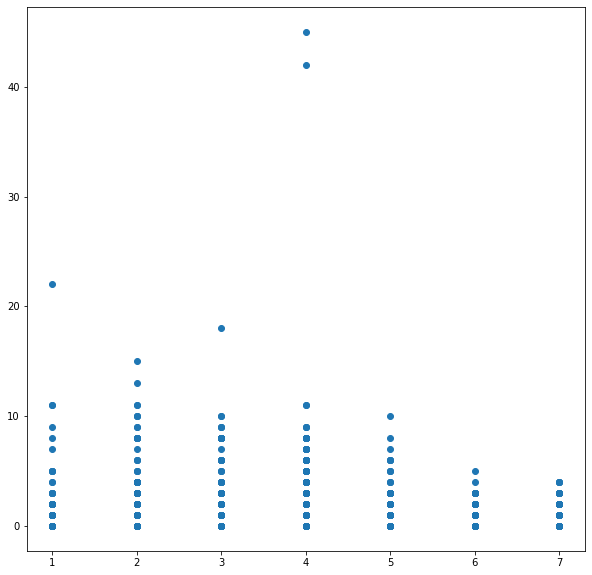

In [ ]:
plt.scatter(num_breaks3, total_pain3)
plt.gcf().set_size_inches((10, 10))  


In [ ]:
masked_breaks3 = np.ma.masked_invalid(num_breaks3)
masked_pain3 = np.ma.masked_invalid(total_pain3)
msk = (~masked_breaks3.mask & ~masked_pain3.mask)
corr_coef3 = np.corrcoef(masked_breaks3[msk], masked_pain3[msk] )
print(corr_coef3)


[[ 1.         -0.07682707]
 [-0.07682707  1.        ]]


In [ ]:
fourormore3 = []
twoorless3 = []
for i in range(len(num_breaks3)):
  if num_breaks3[i] >= 4:
    if not np.isnan(total_pain3[i]):
      fourormore3.append(total_pain3[i])
  if num_breaks3[i] <= 2:
    if not np.isnan(total_pain3[i]):
      twoorless3.append(total_pain3[i])
  

In [ ]:
avgfourormore3 = sum(fourormore3) / len(fourormore3)
avgtwooress3 = sum(twoorless3) / len(twoorless3)

print("AVERAGE PAIN FOR FOUR OR MORE BREAKS IS " + str(avgfourormore3))
print("AVERAGE PAIN FOR TWO OR LESS BREAKS IS " + str(avgtwooress3))

AVERAGE PAIN FOR FOUR OR MORE BREAKS IS 1.3720349563046192
AVERAGE PAIN FOR TWO OR LESS BREAKS IS 1.5413333333333334


In [ ]:
from sklearn.cluster import KMeans

nump3 = mergedTables3.drop(columns=["0"])
nump3 = nump3.to_numpy()
X3 = nump3[:, 22:89]
y3 = nump3[:, 91].reshape(X3.shape[0],1)
Xy3 = np.append(X3, y3, axis = 1)
Xy3 = pd.DataFrame(Xy2)
Xy3 = Xy3.dropna()
Xy3 = Xy3.to_numpy()
X3 = Xy3[:,:-1]
y3 = Xy3[:, -1]
cluster3 = KMeans(n_clusters=7)
fitted3 = cluster3.fit_predict(X3)



def disagreement_dist(P_labels, C_labels):
    disagreement_dist = 0
    for i in range(P_labels.shape[0]):
        for j in range(i + 1, P_labels.shape[0]):
            bucket1 = P_labels[i]
            bucket2 = C_labels[i]
            bucket3 = P_labels[j]
            bucket4 = C_labels[j]
            if bucket1 == bucket3 and bucket2 != bucket4:
                disagreement_dist += 1
            if bucket2 == bucket4 and bucket1 != bucket3:
                disagreement_dist += 1
    return disagreement_dist
  
print(len(fitted3))
2
print(disagreement_dist(y3, fitted3))


1080
281174


(array([308.,  35.,  10.,   9.,   6.,   5.,   1.,   0.,   0.,   1.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

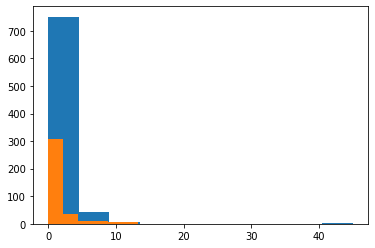

In [ ]:
#Assumption checking for modified
#1.Random distribution
#DATA CLEARNING HERE
import seaborn as sb  
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt
from scipy.stats import norm, uniform
import numpy

plt.hist(fourormore3)
plt.hist(twoorless3)

In [ ]:
import numpy as np

q3, q1 = np.percentile(fourormore3, [75, 25])
print(q3, q1)
print(len(fourormore3))
IQR3 = q3 - q1
upper_bound3 = q3 + 1.5 * IQR3
lower_bound3 = q1 - 1.5 * IQR3
newfourormore3 = [x for x in fourormore3 if (x<upper_bound3) & (x>lower_bound3)]


2.0 0.0
801


In [ ]:
print(len(newfourormore3))
print(len(fourormore3))

751
801


In [ ]:
q3, q1 = np.percentile(twoorless3, [75, 25])
print(q3, q1)
print(len(twoorless3))
IQR3 = q3 - q1
upper_bound3 = q3 + 1.5 * IQR3
lower_bound3 = q1 - 1.5 * IQR3
newtwoorless3 = [x for x in twoorless3 if (x<upper_bound3) &(x>lower_bound3) ]

2.0 0.0
375


In [ ]:
print(len(newtwoorless3))
print(len(twoorless3))

343
375


(array([175.,   0.,  79.,   0.,   0.,  54.,   0.,  23.,   0.,  12.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

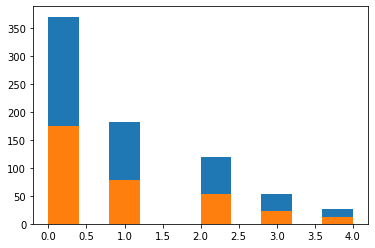

In [ ]:
plt.hist(newfourormore3)
plt.hist(newtwoorless3)

In [ ]:
from scipy.stats import f_oneway
stat, p = f_oneway(newfourormore3, newtwoorless3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('We can not reject the null hypothesis')
else:
	print('We reject the hypothesis')

stat=0.153, p=0.695
We can not reject the null hypothesis


In [ ]:
print(welch_ttest(twoorless3,fourormore3,"equal"))

   T statistic          df  pvalue 2 sided  Difference in mean        lb  \
0     1.017015  775.110107        0.309464            0.169298 -0.157479   

         ub  
0  0.496076  


In [ ]:
print(welch_ttest(newtwoorless3,newfourormore3,"equal"))

   T statistic         df  pvalue 2 sided  Difference in mean        lb  \
0    -0.392039  663.82578        0.695155           -0.028483 -0.171141   

         ub  
0  0.114175  


This also shows that without dropping the outliers, there are more differences between the two data set. Which our conlcusion will be similar to the ones we have drawn for the 4month data. In this case, non of the null hypothesis have been rejected. 

# The 6 Month Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
## Update the experiments directory
DATA_DIRECTORY_AM6 ='/content/drive/Shareddrives/CS 506 Project (Work from Home)/DATA - Working From the Home Environment /6 Month Data/Daily AM /7103000 (3).csv'
DATA_DIRECTORY_END6 ='/content/drive/Shareddrives/CS 506 Project (Work from Home)/DATA - Working From the Home Environment /6 Month Data/Daily END/7108000 (2).csv'
DATA_DIRECTORY_PM6 ='/content/drive/Shareddrives/CS 506 Project (Work from Home)/DATA - Working From the Home Environment /6 Month Data/Daily PM /7106000 (2).csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_AM6 = pd.read_csv(DATA_DIRECTORY_AM6, index_col=False, header=0)
DATA_PM6 = pd.read_csv(DATA_DIRECTORY_PM6,  encoding='cp1252')
DATA_END6 = pd.read_csv(DATA_DIRECTORY_END6)

In [ ]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
DATA_PM_DROPPED6 = DATA_PM6.dropna()
value6 = DATA_PM6['HOMUNCULUS'][0]
splitter6 = value6.split(',')
DATA_PM_HOM6 = DATA_PM_DROPPED6.copy()
for split in splitter6:
  newsplit = split.split(':')
  DATA_PM_HOM6[newsplit] = None
DATA_PM_HOM6['SUMMED VALUES'] = None

In [ ]:
DATA_PM_SPLITTED6 = DATA_PM_HOM6.apply(applyFunc, axis = 1)
DATA_END_TIME6 = DATA_END6.apply(applyTimeFunc, axis = 1)

In [ ]:
mergedTables6 = pd.merge(DATA_PM_SPLITTED6, DATA_END_TIME6, how = 'inner', left_on=['mbl_cod', 'rsp_id', 'local_time'], right_on=['mbl_cod', 'rsp_id', 'local_time'])
num_breaks6 = mergedTables6.DAILY_BREAKS.values
total_pain6 = mergedTables6['SUMMED VALUES'].values

In [ ]:
mergedTables6_new = mergedTables6[['mbl_cod', 'local_time']]
mergedTables6_new['DAILY_BREAKS'] = num_breaks6
mergedTables6_new['PAIN'] = total_pain6
mergedTables6_new.head()

<ipython-input-66-893d99faee5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedTables6_new['DAILY_BREAKS'] = num_breaks6
<ipython-input-66-893d99faee5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedTables6_new['PAIN'] = total_pain6


,mbl_cod,local_time,DAILY_BREAKS,PAIN
0,11822993,2022-05-10,6,1.0
1,11822993,2022-05-11,4,1.0
2,11822993,2022-05-12,5,0.0
3,11822993,2022-05-16,6,1.0
4,11822993,2022-05-17,4,11.0


In [ ]:
quartiles = mergedTables6_new.PAIN.quantile([0.25, 0.75])
print(quartiles)

0.25    0.0
0.75    2.0
Name: PAIN, dtype: float64


In [ ]:
unique_people = mergedTables6.mbl_cod.unique()
df_dictionary = {x : None for x in unique_people}
for key in df_dictionary:
  df = mergedTables6[mergedTables6['mbl_cod'] == key]
  number_breaks = df.DAILY_BREAKS.values
  tot_pain = df['SUMMED VALUES'].values
  fourmore = []
  twoless = []
  for i in range(len(number_breaks)):
    if number_breaks[i] >= 4:
      if not np.isnan(tot_pain[i]):
        fourmore.append(tot_pain[i])
    if number_breaks[i] <= 2:
      if not np.isnan(tot_pain[i]):
        twoless.append(tot_pain[i])
  
  df_dictionary[key] = [twoless, fourmore]

In [ ]:
mergedTables6_new['OUTLIER'] = mergedTables6_new['PAIN'].gt(2 * 1.5)
OUTLIER_TABLE = mergedTables6_new[mergedTables6_new['OUTLIER'] == True]
OUTLIER_TABLE.head()

<ipython-input-69-44f60c0f0856>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedTables6_new['OUTLIER'] = mergedTables6_new['PAIN'].gt(2 * 1.5)


,mbl_cod,local_time,DAILY_BREAKS,PAIN,OUTLIER
4,11822993,2022-05-17,4,11.0,True
50,17309235,2022-05-09,4,4.0,True
52,17309235,2022-05-11,3,6.0,True
54,17309235,2022-05-18,3,4.0,True
89,22141157,2022-05-11,4,4.0,True


In [ ]:
mergedTables6_new['OUTLIER'] = mergedTables6_new['PAIN'].gt(2 * 1.5)
OUTLIER_TABLE = mergedTables6_new[mergedTables6_new['OUTLIER'] == True]
OUTLIER_TABLE.head()

<ipython-input-70-44f60c0f0856>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedTables6_new['OUTLIER'] = mergedTables6_new['PAIN'].gt(2 * 1.5)


,mbl_cod,local_time,DAILY_BREAKS,PAIN,OUTLIER
4,11822993,2022-05-17,4,11.0,True
50,17309235,2022-05-09,4,4.0,True
52,17309235,2022-05-11,3,6.0,True
54,17309235,2022-05-18,3,4.0,True
89,22141157,2022-05-11,4,4.0,True


In [ ]:
OUTLIER_TABLE



,mbl_cod,local_time,DAILY_BREAKS,PAIN,OUTLIER
4,11822993,2022-05-17,4,11.0,True
50,17309235,2022-05-09,4,4.0,True
52,17309235,2022-05-11,3,6.0,True
54,17309235,2022-05-18,3,4.0,True
89,22141157,2022-05-11,4,4.0,True
...,...,...,...,...,...
2200,93909901,2022-05-25,3,8.0,True
2201,93909901,2022-05-26,3,6.0,True
2203,93909901,2022-06-06,4,4.0,True
2206,93909901,2022-06-23,4,6.0,True


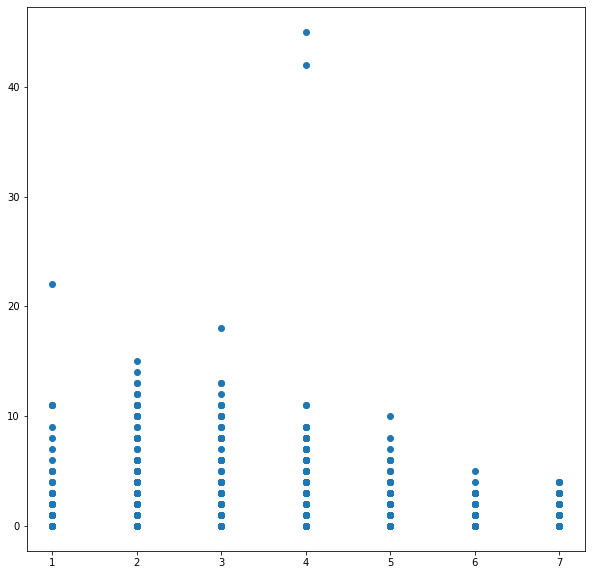

In [ ]:
plt.scatter(num_breaks6, total_pain6)
plt.gcf().set_size_inches((10, 10))  

In [ ]:
masked_breaks6 = np.ma.masked_invalid(num_breaks6)
masked_pain6 = np.ma.masked_invalid(total_pain6)
msk = (~masked_breaks6.mask & ~masked_pain6.mask)
corr_coef6 = np.corrcoef(masked_breaks6[msk], masked_pain6[msk] )
print(corr_coef6)

[[ 1.         -0.09839901]
 [-0.09839901  1.        ]]


In [ ]:
fourormore6 = []
twoorless6 = []
for i in range(len(num_breaks6)):
  if num_breaks6[i] >= 4:
    if not np.isnan(total_pain6[i]):
      fourormore6.append(total_pain6[i])
  if num_breaks6[i] <= 2:
    if not np.isnan(total_pain6[i]):
      twoorless6.append(total_pain6[i])

In [ ]:
avgfourormore6 = sum(fourormore6) / len(fourormore6)
avgtwooress6 = sum(twoorless6) / len(twoorless6)

print("AVERAGE PAIN FOR FOUR OR MORE BREAKS IS " + str(avgfourormore6))
print("AVERAGE PAIN FOR TWO OR LESS BREAKS IS " + str(avgtwooress6))

AVERAGE PAIN FOR FOUR OR MORE BREAKS IS 1.144954128440367
AVERAGE PAIN FOR TWO OR LESS BREAKS IS 1.5695364238410596


In [ ]:
from sklearn.cluster import KMeans

nump6 = mergedTables6.drop(columns=["0"])
nump6 = nump6.to_numpy()
X6 = nump6[:, 22:89]
y6 = nump6[:, 91].reshape(X6.shape[0],1)
Xy6 = np.append(X6, y6, axis = 1)
Xy6 = pd.DataFrame(Xy6)
Xy6 = Xy6.dropna()
Xy6 = Xy6.to_numpy()
X6 = Xy6[:,:-1]
y6 = Xy6[:, -1]
cluster6 = KMeans(n_clusters=7)
fitted6 = cluster6.fit_predict(X6)



def disagreement_dist(P_labels, C_labels):
    disagreement_dist = 0
    for i in range(P_labels.shape[0]):
        for j in range(i + 1, P_labels.shape[0]):
            bucket1 = P_labels[i]
            bucket2 = C_labels[i]
            bucket3 = P_labels[j]
            bucket4 = C_labels[j]
            if bucket1 == bucket3 and bucket2 != bucket4:
                disagreement_dist += 1
            if bucket2 == bucket4 and bucket1 != bucket3:
                disagreement_dist += 1
    return disagreement_dist
  
print(len(fitted6))
print(disagreement_dist(y6, fitted6))

2201
1200154


(array([500.,  51.,  18.,  10.,   9.,  13.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

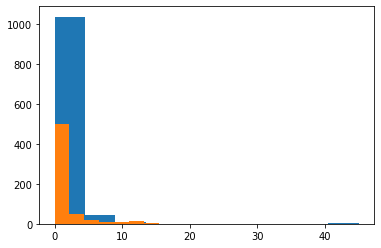

In [ ]:
import seaborn as sb  
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt
from scipy.stats import norm, uniform
import numpy

plt.hist(fourormore6)
plt.hist(twoorless6)

In [ ]:
import numpy as np

q3, q1 = np.percentile(fourormore6, [75, 25])
print(q3, q1)
print(len(fourormore6))
IQR3 = q3 - q1
upper_bound6 = q3 + 1.5 * IQR3
lower_bound6 = q1 - 1.5 * IQR3
newfourormore6 = [x for x in fourormore6 if (x<upper_bound6) & (x>lower_bound6)]

2.0 0.0
1090


In [ ]:
print(len(newfourormore6))
print(len(fourormore6))

1036
1090


In [ ]:
q3, q1 = np.percentile(twoorless6, [75, 25])
IQR3 = q3 - q1
upper_bound6 = q3 + 1.5 * IQR3
lower_bound6 = q1 - 1.5 * IQR3
newtwoorless6 = [x for x in twoorless6 if (x<upper_bound6) &(x>lower_bound6) ]

In [ ]:
print(len(newtwoorless6))
print(len(twoorless6))

551
604


(array([281.,   0., 125.,   0.,   0.,  94.,   0.,  31.,   0.,  20.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

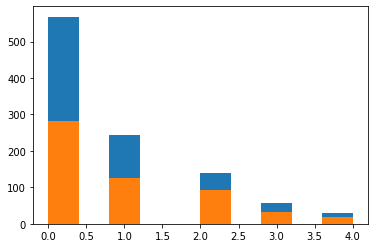

In [ ]:
plt.hist(newfourormore6)
plt.hist(newtwoorless6)

In [ ]:
from scipy.stats import f_oneway
stat, p = f_oneway(newfourormore6, newtwoorless6)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('We can not reject the null hypothesis')
else:
	print('We reject the hypothesis')

stat=3.271, p=0.071
We can not reject the null hypothesis


In [ ]:
from scipy.stats import f_oneway
no_data = []
statistically_sig = []
non_statistically_sig = []
for key in df_dictionary:
  data = df_dictionary[key]
  fourmore = data[1]
  twoless = data[0]
  if len(fourmore) == 0 or len(twoless) == 0:
    no_data.append(key)
    continue
  else:
    stat, p = stats.ttest_ind(twoless, fourmore, equal_var = False)
    if p > 0.05:
      non_statistically_sig.append(key)
    else:
      statistically_sig.append(key)

non_statistically_sig



[23916703,
 32937810,
 33075391,
 34865333,
 37720972,
 49164240,
 49669568,
 55508636,
 58805130,
 60404747,
 61881920,
 66958688,
 66999191,
 69497234,
 71681441,
 73262082,
 77253909,
 80515680,
 81862952,
 86548395,
 93909901]

In [ ]:
print(welch_ttest(newtwoorless6,newfourormore6,"equal"))

   T statistic           df  pvalue 2 sided  Difference in mean        lb  \
0     1.781869  1075.603066        0.075053             0.10211 -0.010332   

         ub  
0  0.214552  


In [ ]:
print(welch_ttest(twoorless6,fourormore6,"equal"))

   T statistic         df  pvalue 2 sided  Difference in mean        lb  \
0     3.237706  1175.6565        0.001239            0.424582  0.167294   

         ub  
0  0.681871  


Here, we noticed that before dropping outliers, people who take four or more breaks will have less pain than people who take two or less breaks. And even after dropping outliers, we still have a small p values. This implies the trend that as time goes, the difference between pain from people who rest more than four times and people who rest less than two times becomes more obvious. If there is more data, we might be sure that there is a difference between the pain both before and after dropping outliers. 


#Combine All Length

In [ ]:
print(len(twoorless), len(twoorless2),len(twoorless3),len(twoorless6))

528 264 375 604


In [ ]:
def meanpain (x2,x3,x4,x6):
  averageless2 = sum(x2) / len(x2)
  averageless3 = sum(x3) / len(x3)
  averageless4 = sum(x4)/len(x4)
  averageless6 = sum(x6)/len(x6)
  newleft = [2,3,4,6]
  newyaxis = (averageless2, averageless3, averageless4, averageless6)
  return newleft, newyaxis

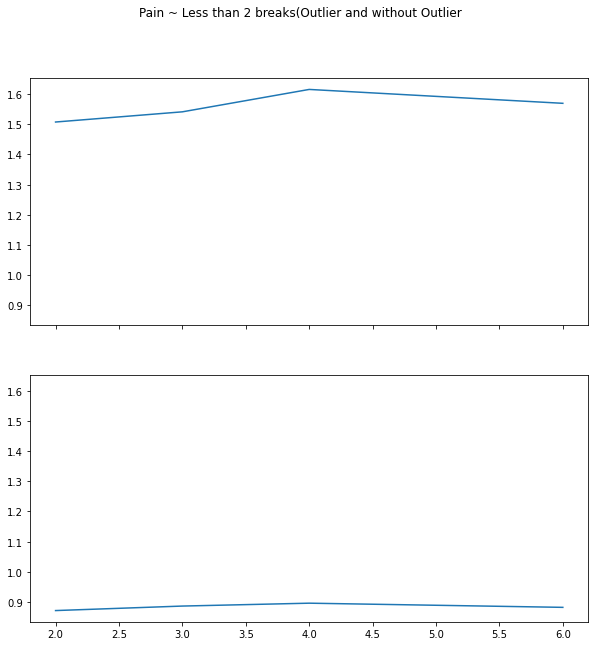

In [ ]:
left, heightfor2 = meanpain(twoorless2, twoorless3, twoorless, twoorless6)


nleft, heightfor2noout = meanpain(newtwoorless2, newtwoorless3, newtwoorless, newtwoorless6)

fig, axs = plt.subplots(2, sharex=True, sharey=True,figsize=(10,10))
fig.suptitle('Pain ~ Less than 2 breaks(Outlier and without Outlier')
axs[0].plot(left, heightfor2)
axs[1].plot(left, heightfor2noout)

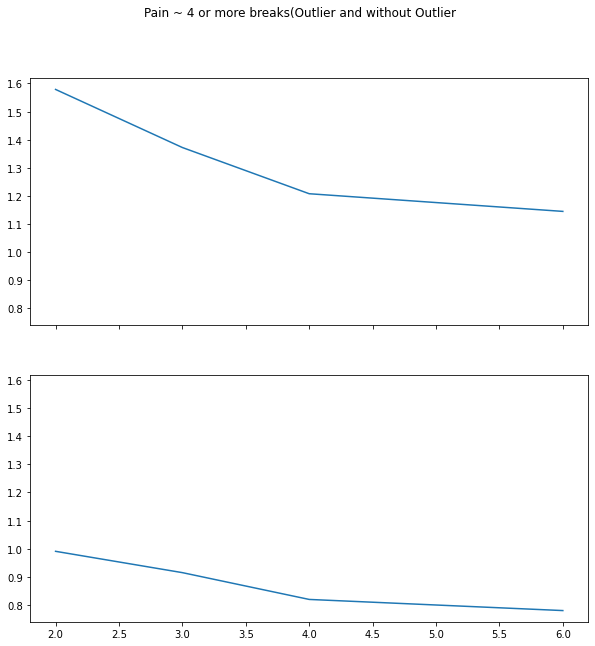

In [ ]:
left, heightfor2 = meanpain(fourormore2, fourormore3, fourormore, fourormore6)


nleft, heightfor2noout = meanpain(newfourormore2, newfourormore3, newfourormore, newfourormore6)

fig, axs = plt.subplots(2, sharex=True, sharey=True,figsize=(10,10))
fig.suptitle('Pain ~ 4 or more breaks(Outlier and without Outlier')
axs[0].plot(left, heightfor2)
axs[1].plot(left, heightfor2noout)

We found that that people who take four or more breaks per day will graduallly lower their pain report during the five month both with or without outliers. 
And for people who take two or three breaks per day, they will gradually feel more pain at the third month but feel less pain at six month. 


According to the trendy graph. We found that the difference between people who rest four or more times and people who rest less than 2 times is affected more by people who take four or more breaks. And we can decided whether people who rest more times does increas their pains despite of what we previously said about the confusing cause-effect relationship. 

# Add them together and conduct test

In [ ]:
newfinalfourormore = newfourormore2+newfourormore3 + newfourormore + newfourormore6
newfinaltwoorless = newtwoorless2 + newtwoorless3 + newtwoorless + newtwoorless6
finalfourormore = fourormore2 + fourormore3 + fourormore + fourormore6
finaltwoorless = twoorless2 + twoorless3 + twoorless + newtwoorless6

In [ ]:
print(welch_ttest(newfinaltwoorless,newfinalfourormore,"equal"))

   T statistic           df  pvalue 2 sided  Difference in mean        lb  \
0     0.859763  3180.075005        0.389984            0.028786 -0.036862   

         ub  
0  0.094434  


In [ ]:
print(welch_ttest(finaltwoorless,finalfourormore,"equal"))

   T statistic           df  pvalue 2 sided  Difference in mean        lb  \
0     0.836839  3961.695473        0.402734             0.05981 -0.080314   

         ub  
0  0.199934  


We notice that the pvalue increases before all the cases. It might because at the beginning people who rest four or more times a day feel much higher pain. So by combining them together we found that it is not significant. However, when we seperate them and conduct hypothesis test one by one, it shows a trend that even though some people who rest four or more times because of their original pain, they feel less and less pain as time goes by. And we can see the effects of outliers became less and less also because we see the p-value of two tests became convergent. 